In [28]:
#Importing the required libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import  StandardScaler

In [15]:
#Correlation matrix

def plot_corr_matrix(df, g_width):
    file_name=df.dataframeName
    df=df.dropna('columns') #drop columns with NaN
    df=df[[col for col in df if df[col].nunique()>1]] #Keep columns where there are more 1 unique values
    if df.shape[1]<2:
        print(f'No correlation plots shown:The no. of non-NaN or constant columns) ({df.shape[1]}) is less than 2')
        return
    corr=df.corr()
    plt.figure(num=None, figsize=(g_width, g_width), dpi=80, facecolor='w', edgecolor='k')
    corr_matrix=plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corr_matrix)
    plt.title(f'correlation Matrix for {file_name}',fontsize=15)
    plt.show()

In [16]:
#Scatter and density plots

def plot_scatter_mat(df, plot_size, text_size):
    df=df.select_dtypes(include=[np.number]) #Keep only numerical columns
    ## Drop nan values
    df=df.dropna('columns')
    df=df[[col for col in df if df[col].nunique()>1]] #Keep columns where there are more 1 unique values
    column_names=list(df)
    if len(column_names)>10:
        column_names=column_names[:10]
    df=df[column_names]
    ax=pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plot_size, plot_size], diagonal='kde')
    corr=df.corr().values
    for i,j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corr[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=text_size)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
        
    

In [17]:
n_rows=1000
df=pd.read_csv('all_stocks_5yr.csv', delimiter=',', nrows=n_rows)
df.dataframeName='all_stocks_5yr.csv'

In [18]:
df.shape

(1000, 7)

In [19]:
df.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,15.07,15.12,14.63,14.75,8407500,AAL
1,2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL
2,2/12/2013,14.45,14.51,14.10,14.27,8126000,AAL
3,2/13/2013,14.30,14.94,14.25,14.66,10259500,AAL
4,2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL


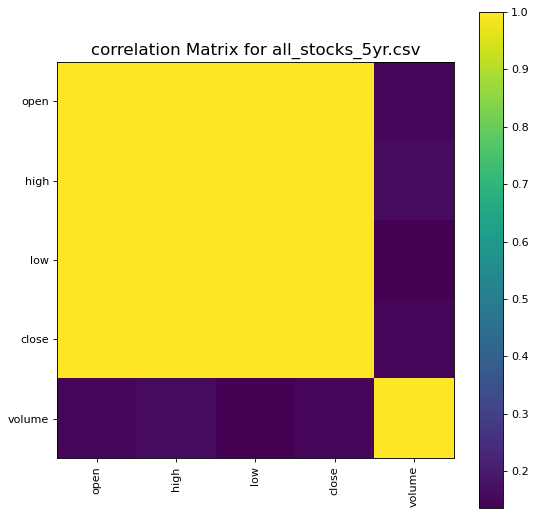

In [21]:
plot_corr_matrix(df,8)

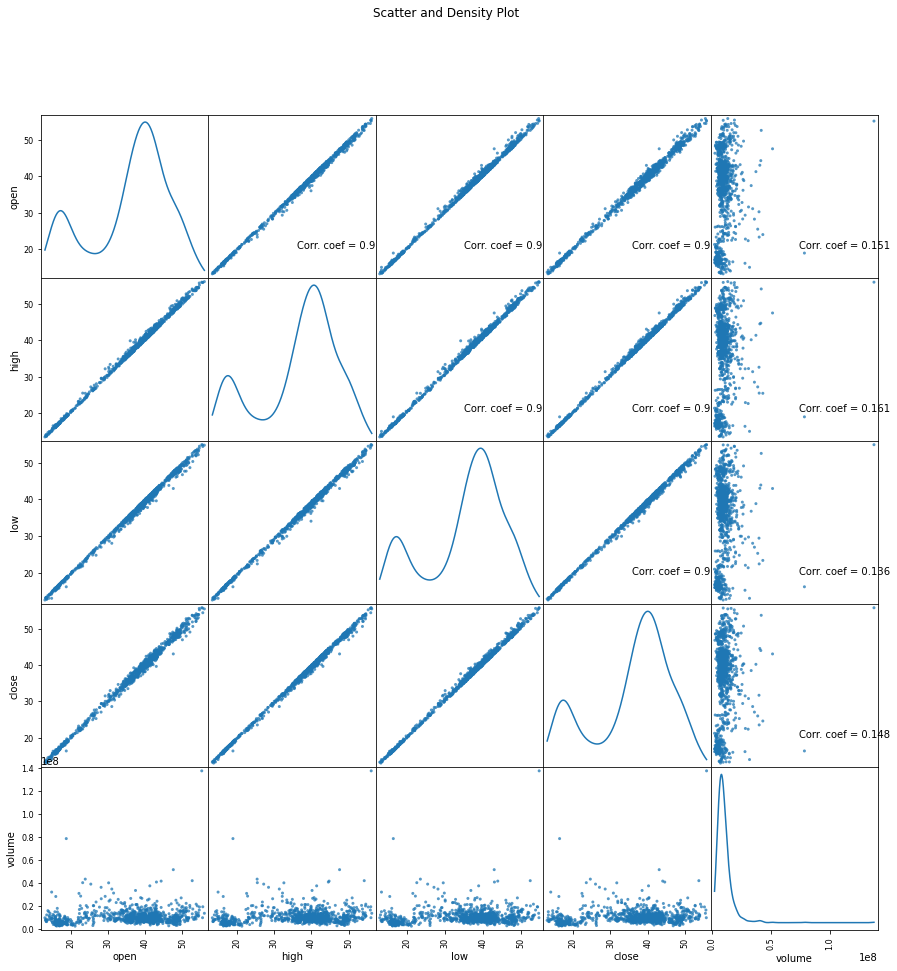

In [22]:
plot_scatter_mat(df, 15,10)

# 2nd Dataset

In [23]:
n_rows = 1000

df_1 = pd.read_csv('ABC_data.csv')
df_1.dataframeName = 'ABC_data.csv'

In [24]:
df_1.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,46.52,46.895,46.46,46.89,1232802,ABC
1,2/11/2013,46.85,47.000,46.50,46.76,1115888,ABC
2,2/12/2013,46.70,47.050,46.60,46.96,1318773,ABC
3,2/13/2013,46.74,46.900,46.60,46.64,2645247,ABC
4,2/14/2013,46.67,46.990,46.60,46.77,1941879,ABC


In [25]:
df_1.shape

(1259, 7)

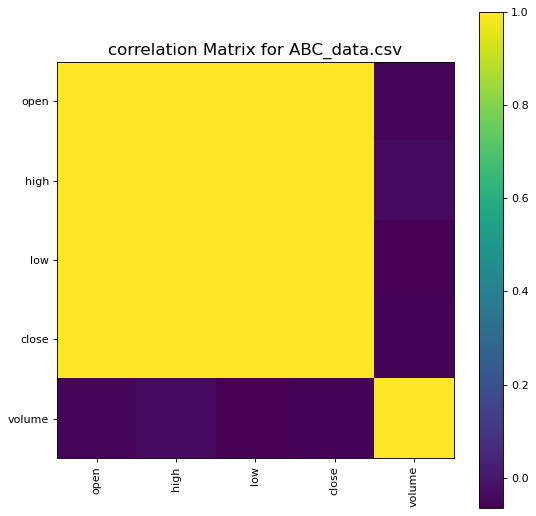

In [26]:
plot_corr_matrix(df_1, 8)

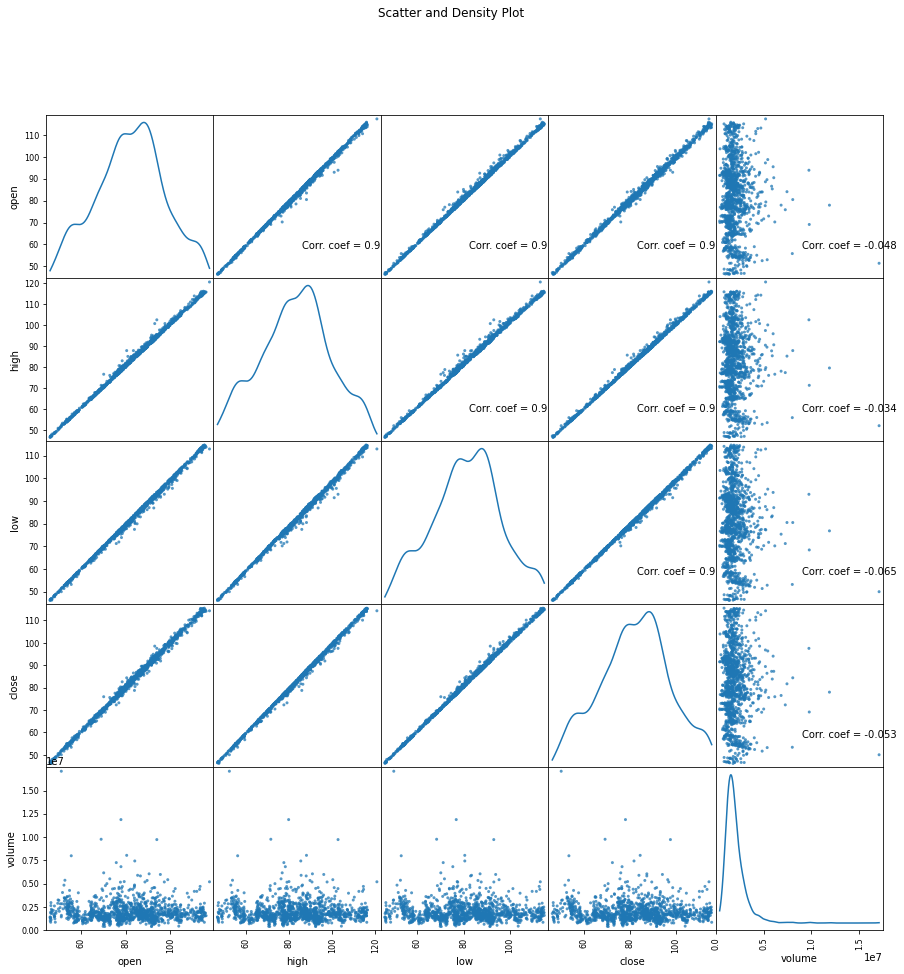

In [27]:
plot_scatter_mat(df_1, 15, 10)